In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


### 1. Cargamos Dataset

In [2]:
data = pd.read_csv("titanic.csv")

In [3]:
print(str(data.shape) + '\n')

(891, 12)



In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Eliminamos columna de id

In [5]:
data.drop('PassengerId', axis =1, inplace = True)
print(str(data.shape))

(891, 11)


### 2. Análisis de Datos para toma de decisiones en FE Pipeline

#### 2.1 Análisis del target


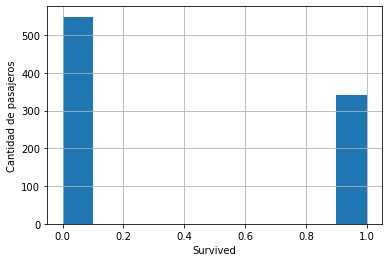

In [6]:
data['Survived'].hist()
plt.xlabel('Survived')
plt.ylabel("Cantidad de pasajeros")
plt.show()

### 2.2 Verificamos tipos de variables en x

In [7]:
data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [8]:
cat_vars = [var for var in data.columns if data[var].dtype == 'O']
#data.dtypes

cat_vars = cat_vars + ['Pclass']

In [9]:
# Cantidad de variables categóricas
len(cat_vars)

6

In [10]:
cat_vars

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Pclass']

In [11]:
#Asegurarnos que todas quedan tipo categoría

data[cat_vars] = data[cat_vars].astype('O')
data[cat_vars].dtypes

Name        object
Sex         object
Ticket      object
Cabin       object
Embarked    object
Pclass      object
dtype: object

In [12]:
#Variables numericas
num_vars = [var for var in data.columns if(var not in cat_vars and var != 'Survived')]

In [13]:
data[num_vars].dtypes

Age      float64
SibSp      int64
Parch      int64
Fare     float64
dtype: object

### 2.3 Análisis de valores faltantes (verificar el pñorcentaje de pérdida y cómo impacta el target)

In [14]:
var_with_na = [var for var in data.columns if (data[var].isnull().sum() > 0)] #is null mapea True o False, y por eso se suma
len(var_with_na)

3

In [15]:
#proporcion de NAs en cada variable
data[var_with_na].isnull().mean().sort_values(ascending = False)

Cabin       0.771044
Age         0.198653
Embarked    0.002245
dtype: float64

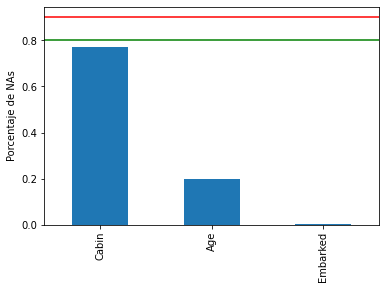

In [16]:
#Porcentajes de NAs
data[var_with_na].isnull().mean().sort_values(ascending= False).plot.bar()
plt.ylabel("Porcentaje de NAs")
plt.axhline(y=0.9, color= "r")
plt.axhline(y=0.8, color= "g") #abajo de esta línea es rescatable

In [17]:
cat_na = [var for var in cat_vars if var in var_with_na]
cat_na

['Cabin', 'Embarked']

In [18]:
#variables numericas con NAS
num_na = [var for var in num_vars if var in var_with_na]
num_na

['Age']

In [19]:
print("Cantidad de variables numéricas con NAs. {}".format(len(num_na)))
print("Cantidad de variables categóricaas con NAs. {}".format(len(cat_na)))

Cantidad de variables numéricas con NAs. 1
Cantidad de variables categóricaas con NAs. 2


### 2.3.1 Qué tanto impacta el NA contra el target? Verificación 

In [20]:
#Funcion
def na_impact_over_target(df,Xvar, Yvar):
    df = data.copy()
    df[Xvar] = np.where(df[Xvar].isnull(), 1, 0)
    temp = df.groupby(Xvar)[Yvar].agg(['mean', 'std'])
    temp.plot(kind = "barh", y="mean", xerr="std", legend=False, title=Yvar)
    plt.show()

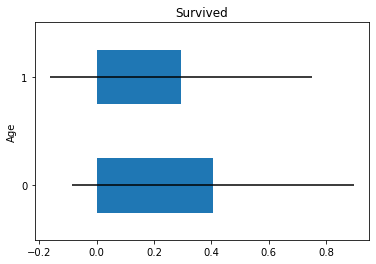

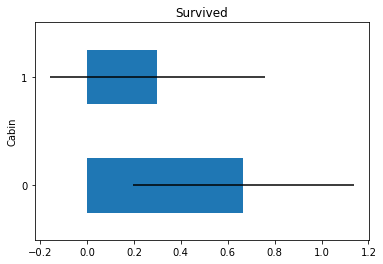

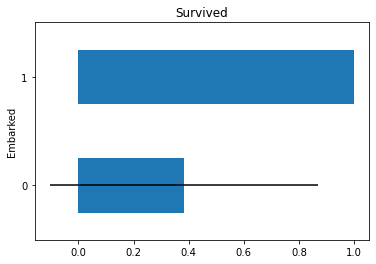

In [21]:
for var in var_with_na:
    na_impact_over_target(data, var, 'Survived')

### 2.4 Análisis de variables temporales

No se cuentan con variables temporales.

### Análisis de variables

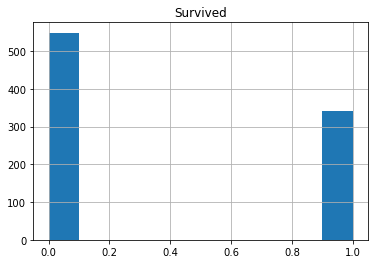

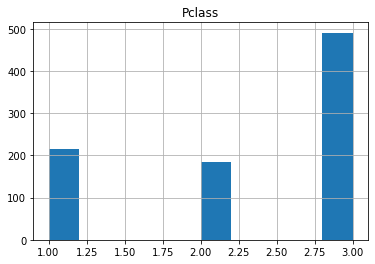

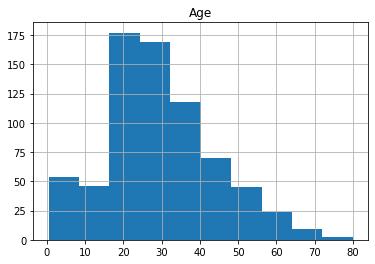

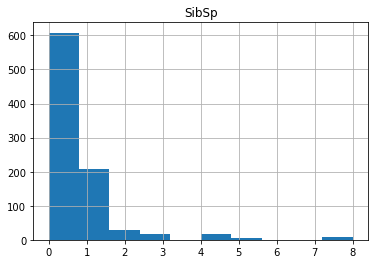

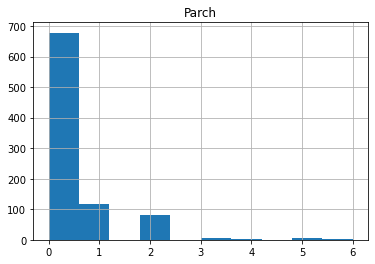

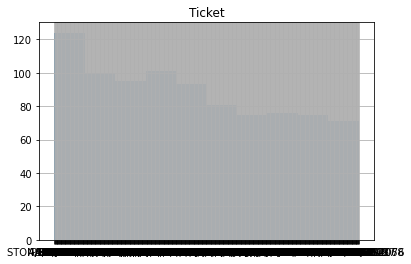

In [22]:
#Subset con únicamente datos numéricos
Numerical = data.iloc[:, [0, 1, 4, 5, 6, 7]]

#Visualización de datos
for column in Numerical:
  Numerical[column].hist()
  plt.title(column)
  print("")
  plt.show()

## 2.5 Variables discretas

In [23]:
discrete_vars = [var for var in num_vars if ((len(data[var].unique()) < 20))]
discrete_vars

['SibSp', 'Parch']

In [24]:
print("Cantidad de Variables Discretas: ", len(discrete_vars))

Cantidad de Variables Discretas:  2


In [25]:
data[discrete_vars].head()

,SibSp,Parch
0,1,0
1,1,0
2,0,0
3,1,0
4,0,0


In [26]:
import seaborn as sns

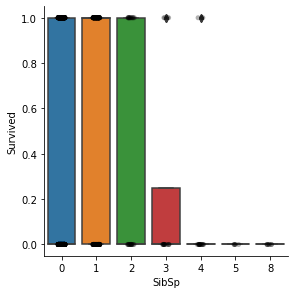

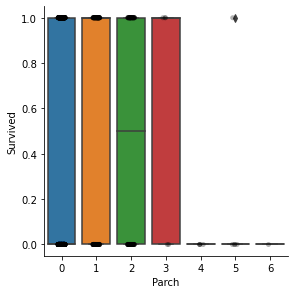

In [27]:
for var in discrete_vars:
    sns.catplot(x= var, y='Survived', data=data, kind="box", height=4)
    sns.stripplot(x= var, y='Survived', data=data, jitter=0.1, alpha=0.3, color='k')
    plt.show()

## 2.6 Variables continuas

In [28]:
cont_vars = [var for var in num_vars if var not in discrete_vars ]
cont_vars

['Age', 'Fare']

In [29]:
print("Cantidad de Variables Continuas: ", len(cont_vars))

Cantidad de Variables Continuas:  2


In [30]:
data[cont_vars].head()

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


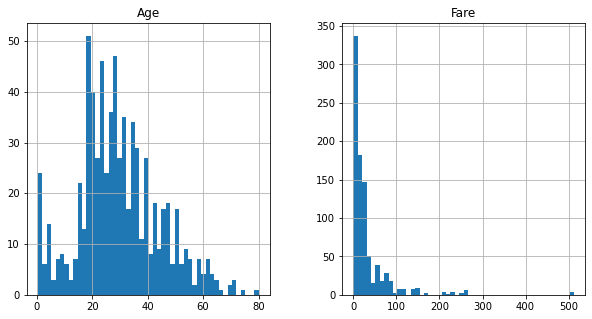

In [31]:
data[cont_vars].hist(bins=50, figsize=(10,5))
plt.show()

In [32]:
#sesgadas = ['Fare']

In [33]:
#cont_vars = [var for var in cont_vars if var not in sesgadas ]
#cont_vars

### transformación especial de Yeo-Johnson

In [34]:
import scipy.stats as stats

In [35]:
temp_yj = data.copy()

In [36]:
for var in cont_vars:
    temp_yj[var], param= stats.yeojohnson(data[var])

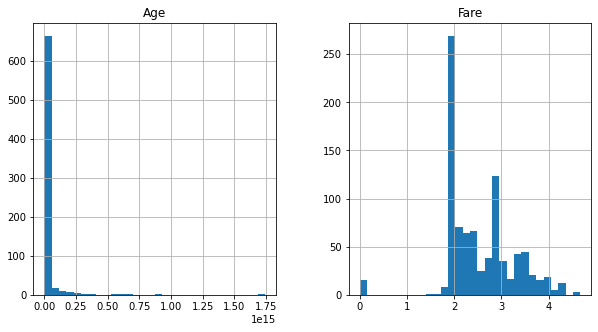

In [37]:
temp_yj[cont_vars].hist(bins=30, figsize=(10,5))
plt.show()

In [38]:
temp = data.copy()

for var in cont_vars:
    temp[var]= np.log(data[var]+1)

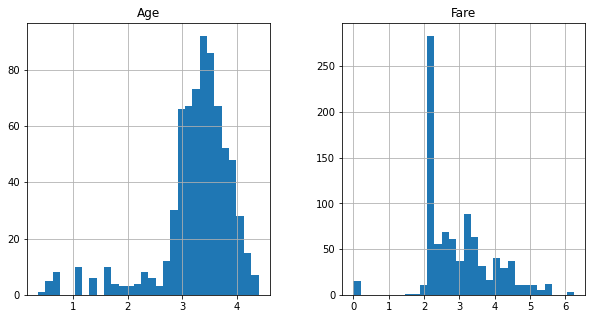

In [39]:
temp[cont_vars].hist(bins=30, figsize=(10,5))
plt.show()

Para la variable Age no haremos ninguna transformación.

In [40]:
TransfJY = ['Fare']

In [41]:
tempFare = data.copy()

In [42]:
for var in TransfJY:
    tempFare[var], param= stats.yeojohnson(data[var])

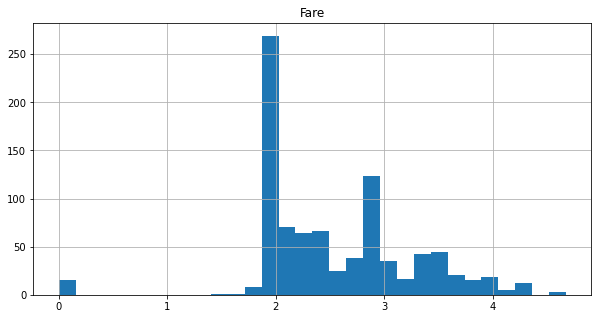

In [43]:
tempFare[TransfJY].hist(bins=30, figsize=(10,5))
plt.show()

C:\Anaconda\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


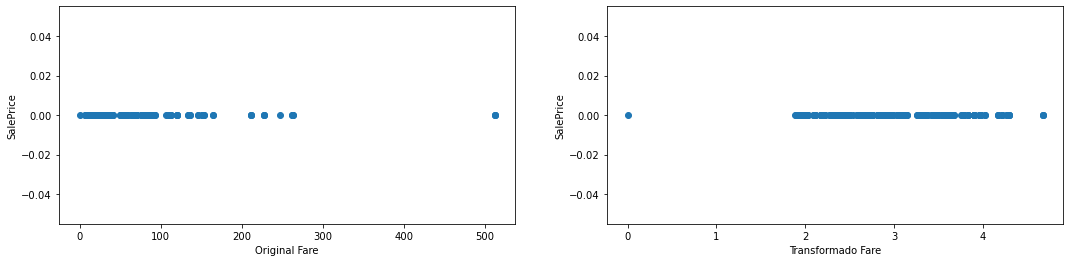

In [44]:
for var in TransfJY:
    plt.figure(figsize =(18, 4))
    
    plt.subplot(1,2,1)
    plt.scatter(data[var], np.log(data['Survived']))
    plt.ylabel("SalePrice")
    plt.xlabel("Original " + var)
    
    plt.subplot(1,2,2)
    plt.scatter(tempFare[var], np.log(data['Survived']))
    plt.ylabel("SalePrice")
    plt.xlabel("Transformado " + var)

    
    plt.show()

### 2.7 Variables categóricas

In [45]:
len(cat_vars)

6

In [46]:
data[cat_vars].head()

,Name,Sex,Ticket,Cabin,Embarked,Pclass
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S,3
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C,1
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S,3
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S,1
4,"Allen, Mr. William Henry",male,373450,NaN,S,3


<AxesSubplot:>

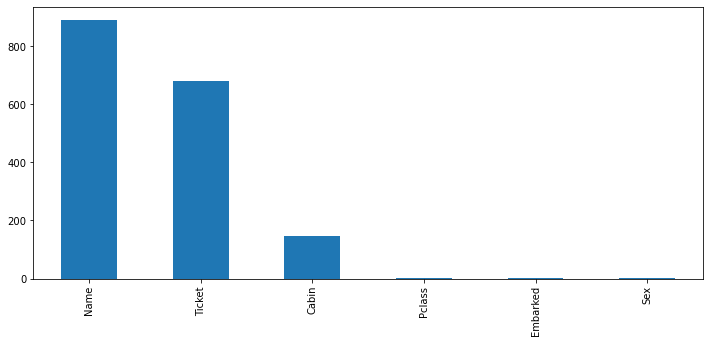

In [47]:
data[cat_vars].nunique().sort_values(ascending=False).plot.bar(figsize=(12,5))

In [48]:
data['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [49]:
np.unique(data['Pclass'])

array([1, 2, 3], dtype=object)

In [50]:
class_mapping = {'Primera': 1, 'Segunda':2, 'Tercera':3, 'Missing':0, 'NA':0, 'NaN':0 }

In [51]:
data['Pclass'] = data['Pclass'].map(class_mapping)

In [52]:
data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [53]:
embarked_mapping = {'C': 1, 'Q':2, 'S':3, 'Missing':0, 'NA':0, 'NaN':0 }

In [54]:
data['Embarked'] = data['Embarked'].map(embarked_mapping)

In [55]:
data['Sex'].unique()

array(['male', 'female'], dtype=object)

In [56]:
sex_mapping = {'male': 1, 'female':0, 'Missing':0, 'NA':0, 'NaN':0 }

In [57]:
data['Sex'] = data['Sex'].map(sex_mapping)

In [58]:
qual_vars =  ['Embarked', 'Pclass', 'Sex']

In [60]:
otras = [var for var in cat_vars if var not in qual_vars]

In [61]:
len(otras)

3

### 2.7 Rare labels:

In [62]:
def analyse_rare_labels(df, var, rare_perc):
    temp = df.groupby(var)['Survived'].count()/len(df)
    
    return temp[temp< rare_perc]

In [63]:
for var in otras:
    print(analyse_rare_labels(data, var, 0.01))
    print()

Name
Abbing, Mr. Anthony                      0.001122
Abbott, Mr. Rossmore Edward              0.001122
Abbott, Mrs. Stanton (Rosa Hunt)         0.001122
Abelson, Mr. Samuel                      0.001122
Abelson, Mrs. Samuel (Hannah Wizosky)    0.001122
                                           ...   
de Mulder, Mr. Theodore                  0.001122
de Pelsmaeker, Mr. Alfons                0.001122
del Carlo, Mr. Sebastiano                0.001122
van Billiard, Mr. Austin Blyler          0.001122
van Melkebeke, Mr. Philemon              0.001122
Name: Survived, Length: 891, dtype: float64

Ticket
110152         0.003367
110413         0.003367
110465         0.002245
110564         0.001122
110813         0.001122
                 ...   
W./C. 6608     0.004489
W./C. 6609     0.001122
W.E.P. 5734    0.001122
W/C 14208      0.001122
WE/P 5735      0.002245
Name: Survived, Length: 681, dtype: float64

Cabin
A10    0.001122
A14    0.001122
A16    0.001122
A19    0.001122
A20    0.00112